#MNIST Digit Identifier - Kaggle Competition (SCORE: 0.98964)
Welcome to this Google Colab notebook for the MNIST Digit Identification Kaggle competition!

https://www.kaggle.com/competitions/digit-recognizer/overview

## Overview

Competition: Classify handwritten digits (0-9) from the MNIST dataset
Dataset: 28x28 pixel grayscale images of handwritten digits
Goal: Develop a model to accurately predict the digit in each image

## Notebook Contents

1. Data loading and exploration
2. Preprocessing and data augmentation
3. K-Fold Cross-Validation
4. Model building (CNN architecture)
5. Training and evaluation
6. Prediction and submission generation

## Key Features

Implement K-Fold Cross-Validation to:

* Assess model performance more robustly
* Reduce overfitting
* Provide insights into model stability across different data subsets

Let's get started with importing the necessary libraries and loading our data!

In [84]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

In [85]:
# Load CSV data
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [86]:
#split train to train and eval
df_train, df_eval = train_test_split(df_train, test_size=0.2, random_state=42)

# Define label
y_train = df_train["label"]
y_test = df_eval["label"]
# Drop 'label' column
X_train = df_train.drop(labels = ["label"],axis = 1)
X_test = df_eval.drop(labels = ["label"],axis = 1)

In [87]:
# Check for null values
X_train.isnull().any().describe()

,0
count,784
unique,1
top,False
freq,784


In [88]:
X_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,...,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000,33600.0,33600.0,33600.0,33600.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.232589,0.123899,0.066042,0.025238,0.021548,0.003571,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.689593,4.625719,3.520927,1.967568,2.118097,0.463160,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [89]:
# Preprocess the data
X_train = X_train.astype('float32') / 255.0
# Reshape X_train to have rank 4 (assuming 28x28 grayscale images)
X_train = X_train.values.reshape(-1, 28, 28, 1)

X_test = X_test.astype('float32') / 255.0
# Reshape X_test to have rank 4 (assuming 28x28 grayscale images)
X_test = X_test.values.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [90]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create an image data generator with augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode='nearest'
)

In [91]:
X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

1. Define a more complex architecture and try to improve performance.

In [92]:
#import Conv2D
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout

# Define the model
def create_model():
  model = Sequential()
  model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
  model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
  model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(512, activation = "relu"))
  model.add(Dropout(0.5))
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation = "softmax"))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model # Add return statement to return the compiled model

>*K-fold cross-validation is a robust technique used in machine learning to assess the performance and generalizability of a model. It involves dividing the dataset into k equally sized folds or subsets. The model is trained k times, each time using k-1 folds as the training set and the remaining fold as the validation set. This process is repeated so that each fold is used once as a validation set. The results from each iteration are then averaged to provide a comprehensive evaluation of the model's performance, reducing the risk of overfitting and providing a more reliable estimate of how the model will perform on unseen data.*



2. Explore the effects of modifying the value of k in k-fold cross-validation. Does increasing the value of k always lead to better results? Explain your reasoning.

In [93]:
# Make sure to import the necessary modules
from sklearn.model_selection import KFold

# Assuming you want folds, for example
KFold = KFold(n_splits=9)

# Perform manual cross-validation
confusion_matrices = []
classification_reports = []
all_true = []
all_pred = []
auc_scores = []

for train_index, val_index in KFold.split(X_train, y_train):
    # Use array indexing to select rows by position
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Reshape the input data to match the CNN input shape
    X_train_fold = X_train_fold.reshape(-1, 28, 28, 1) # Extract values from DataFrame and reshape
    X_val_fold = X_val_fold.reshape(-1, 28, 28, 1) # Extract values from DataFrame and reshape

    model = create_model()  # Create a fresh model for each fold
    model.fit(datagen.flow(X_train_fold, y_train_fold, batch_size=32), epochs=30, verbose=0, validation_data=(X_train_fold, y_train_fold))

    # Predict on the validation fold
    fold_predictions = model.predict(X_val_fold)
    y_pred_fold = np.argmax(fold_predictions, axis=1)
    y_true_fold = np.argmax(y_val_fold, axis=1)

    # Store true and predicted labels
    all_true.extend(y_true_fold)
    all_pred.extend(y_pred_fold)

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_true_fold, y_pred_fold)
    confusion_matrices.append(conf_matrix)

    # Calculate classification report
    report = classification_report(y_true_fold, y_pred_fold, output_dict=True)
    classification_reports.append(report)

    # Calculate ROC-AUC for digit 7 using one-vs-rest
    y_prob_fold = fold_predictions[:, 7]  # Probabilities for class 7
    auc_score = roc_auc_score((y_true_fold == 7).astype(int), y_prob_fold)
    auc_scores.append(auc_score)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [95]:
auc_scores

[0.9999971498603432,
 0.9999610607063588,
 0.9999726837420059,
 0.9999503692527595,
 0.9998976628059765,
 0.9997864111486808,
 0.9999977247044012,
 0.9997856770623078,
 0.999936606221436]

In [101]:
print (classification_reports)

[{'0': {'precision': 0.9970845481049563, 'recall': 0.9970845481049563, 'f1-score': 0.9970845481049563, 'support': 343.0}, '1': {'precision': 0.9976525821596244, 'recall': 0.9976525821596244, 'f1-score': 0.9976525821596244, 'support': 426.0}, '2': {'precision': 0.9975062344139651, 'recall': 0.9975062344139651, 'f1-score': 0.9975062344139651, 'support': 401.0}, '3': {'precision': 0.994535519125683, 'recall': 0.9972602739726028, 'f1-score': 0.9958960328317372, 'support': 365.0}, '4': {'precision': 0.9910714285714286, 'recall': 0.9881305637982196, 'f1-score': 0.9895988112927192, 'support': 337.0}, '5': {'precision': 0.9912280701754386, 'recall': 0.9854651162790697, 'f1-score': 0.9883381924198251, 'support': 344.0}, '6': {'precision': 0.9975669099756691, 'recall': 0.9832134292565947, 'f1-score': 0.9903381642512077, 'support': 417.0}, '7': {'precision': 0.9976415094339622, 'recall': 0.9976415094339622, 'f1-score': 0.9976415094339622, 'support': 424.0}, '8': {'precision': 0.9878048780487805, 

The ROC-AUC plot for digit 7 (using the one-vs-rest approach) is generated based on the final model's predictions on the test set. This plot helps visualize the trade-off between true positive and false positive rates for detecting digit 7.

In [102]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Aggregate confusion matrix
agg_conf_matrix = sum(confusion_matrices)

# Confusion matrix with percentages
conf_matrix_percent = agg_conf_matrix.astype('float') / agg_conf_matrix.sum(axis=1)[:, np.newaxis]

# Aggregate classification report
avg_classification_report = {}
for key in classification_reports[0].keys():
    if isinstance(classification_reports[0][key], dict):
        avg_classification_report[key] = {metric: np.mean([report[key][metric] for report in classification_reports if key in report]) for metric in classification_reports[0][key]}
    else:
        avg_classification_report[key] = np.mean([report[key] for report in classification_reports if key in report])

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=15, min_delta=0.001)
# Define ModelCheckpoint callback (optional)
# Change the filename to include the .h5 extension
model_checkpoint = ModelCheckpoint(filepath='/content/best_model.keras', monitor='val_accuracy', save_best_only=True)
callbacks = [early_stopping, model_checkpoint]  # Use both callbacks as needed


# Train the final model on the entire training set
final_model = create_model()
# Convert X_train to a NumPy array before reshaping
final_model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=30, validation_data=(X_test.reshape(-1,28,28,1), y_test), verbose=2, callbacks=callbacks)

#save model
final_model.save('/content/final_model.keras')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1050/1050 - 18s - 17ms/step - accuracy: 0.7893 - loss: 0.6374 - val_accuracy: 0.9793 - val_loss: 0.0716
Epoch 2/30
1050/1050 - 12s - 12ms/step - accuracy: 0.9400 - loss: 0.2015 - val_accuracy: 0.9870 - val_loss: 0.0405
Epoch 3/30
1050/1050 - 12s - 12ms/step - accuracy: 0.9537 - loss: 0.1556 - val_accuracy: 0.9879 - val_loss: 0.0395
Epoch 4/30
1050/1050 - 12s - 12ms/step - accuracy: 0.9574 - loss: 0.1425 - val_accuracy: 0.9888 - val_loss: 0.0372
Epoch 5/30
1050/1050 - 12s - 12ms/step - accuracy: 0.9639 - loss: 0.1220 - val_accuracy: 0.9898 - val_loss: 0.0343
Epoch 6/30
1050/1050 - 12s - 12ms/step - accuracy: 0.9675 - loss: 0.1164 - val_accuracy: 0.9900 - val_loss: 0.0328
Epoch 7/30
1050/1050 - 12s - 11ms/step - accuracy: 0.9677 - loss: 0.1131 - val_accuracy: 0.9892 - val_loss: 0.0392
Epoch 8/30
1050/1050 - 12s - 11ms/step - accuracy: 0.9706 - loss: 0.1021 - val_accuracy: 0.9906 - val_loss: 0.0315
Epoch 9/30
1050/1050 - 12s - 11ms/step - accuracy: 0.9718 - loss: 0.1011 - val_accuracy: 0.

In [103]:
# Load the best model
#final_model = tf.keras.models.load_model('/content/final_model.keras')

# Predict on the test set
# Convert X_test to a NumPy array before reshaping
y_pred_test = np.argmax(final_model.predict(X_test), axis=1)
y_true_test = np.argmax(y_test, axis=1)

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Final Classification Report on Test Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       816
           1       1.00      0.99      1.00       909
           2       0.99      0.99      0.99       846
           3       1.00      0.99      1.00       937
           4       0.98      1.00      0.99       839
           5       0.99      0.99      0.99       702
           6       1.00      0.99      0.99       785
           7       0.99      0.99      0.99       893
           8       0.98      0.99      0.99       835
           9       1.00      0.97      0.98       838

    accuracy                           0.99      8400
   macro avg       0.99      0.99      0.99      8400
weighted avg       0.99      0.99      0.99      8400



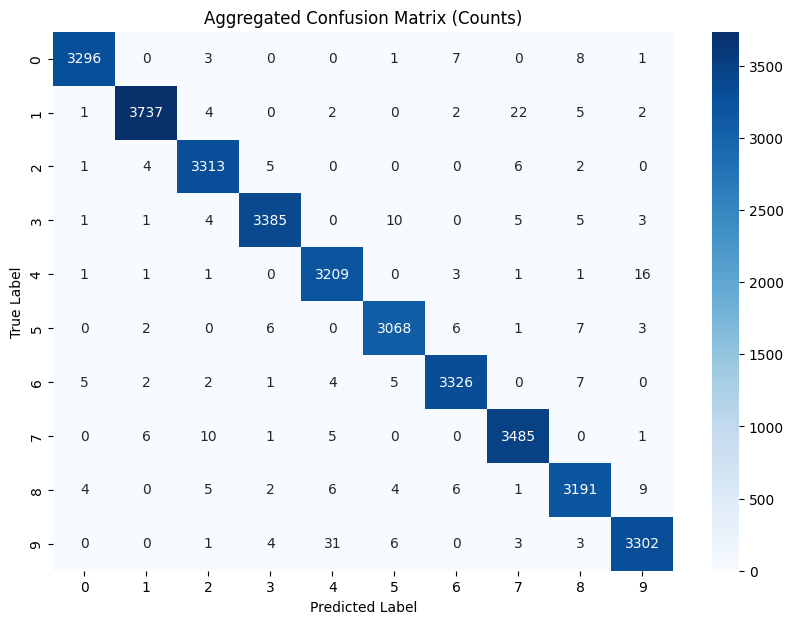

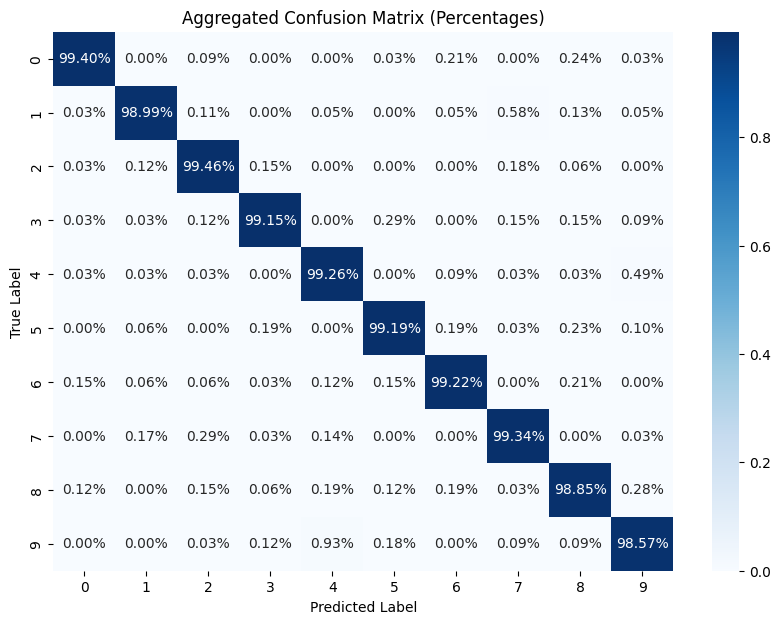

Cross-Validation One-vs-Rest ROC-AUC for digit 7: Mean AUC = 0.9999, Std AUC = 0.0001


In [104]:
# Classification report
print("Final Classification Report on Test Set:\n", classification_report(y_true_test, y_pred_test))

# Visualization of aggregated confusion matrix with counts
plt.figure(figsize=(10, 7))
sns.heatmap(agg_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Aggregated Confusion Matrix (Counts)')
plt.show()

# Visualization of aggregated confusion matrix with percentages
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2%", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Aggregated Confusion Matrix (Percentages)')
plt.show()

# Summary for One-vs-Rest classification on digit 7
print("Cross-Validation One-vs-Rest ROC-AUC for digit 7: Mean AUC = {:.4f}, Std AUC = {:.4f}".format(np.mean(auc_scores), np.std(auc_scores)))

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


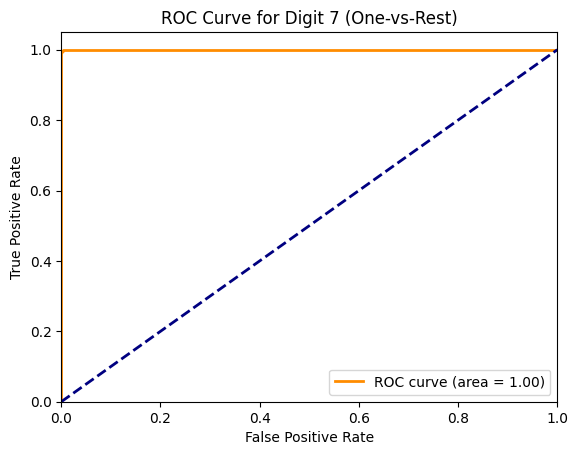

In [105]:
# Plot the ROC curve for digit 7 (One-vs-Rest)
# Convert X_test to a NumPy array before reshaping
y_prob_test = final_model.predict(X_test)[:, 7]
fpr, tpr, _ = roc_curve((y_true_test == 7).astype(int), y_prob_test)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_score((y_true_test == 7).astype(int), y_prob_test)))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Digit 7 (One-vs-Rest)')
plt.legend(loc="lower right")
plt.show()

3. Evaluate the ROC-AUC scores for each digit, and identifying the digit with the worst performance that may need further attention.

In [106]:
import numpy as np

# Calculate ROC-AUC for each digit (One-vs-Rest)
roc_auc_scores = []
for digit in range(10):
    # Convert X_test to a NumPy array before reshaping
    y_prob_test_digit = final_model.predict(X_test)[:, digit]
    roc_auc = roc_auc_score((y_true_test == digit).astype(int), y_prob_test_digit)
    roc_auc_scores.append(roc_auc)
    print(f"ROC-AUC for digit {digit}: {roc_auc:.4f}")

# Identify the digit with the worst ROC-AUC score
worst_digit = np.argmin(roc_auc_scores)
print(f"\nDigit with the worst ROC-AUC score: {worst_digit} (ROC-AUC = {roc_auc_scores[worst_digit]:.4f})")

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ROC-AUC for digit 0: 1.0000
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ROC-AUC for digit 1: 1.0000
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ROC-AUC for digit 2: 0.9999
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ROC-AUC for digit 3: 1.0000
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ROC-AUC for digit 4: 0.9999
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ROC-AUC for digit 5: 1.0000
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ROC-AUC for digit 6: 1.0000
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ROC-AUC for digit 7: 1.0000
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ROC-AUC for digit 8: 0.9999
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ROC-AUC for digit 9: 0.9999

Digit with the worst ROC-AUC score: 9 (ROC-AUC = 0.9999)


In [107]:
submission = pd.read_csv('/content/sample_submission.csv')
submission

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [108]:
# Predict digit for the df_test

# Reshape df_test to match the expected input shape of the model
df_test_reshaped = df_test.values.reshape(-1, 28, 28, 1)

# Predict on the df_test set
predictions = final_model.predict(df_test_reshaped)

# Get the predicted digit (index of the highest probability) for each sample
predicted_digits = np.argmax(predictions, axis=1)

# Create a submission DataFrame
submission = pd.DataFrame({'ImageId': range(1, len(predicted_digits) + 1), 'Label': predicted_digits})
#use ImageId column as index
submission.set_index('ImageId', inplace=True)

# Save the submission to a CSV file
submission.to_csv('my_submission.csv', index=True)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [109]:
submission

,Label
ImageId,
1,2
2,0
3,9
4,5
5,3
...,...
27996,9
27997,7
27998,3


In [110]:
#make a beep sound when done
from google.colab import output
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')